In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
import re
from unidecode import unidecode

nltk.download('stopwords')
from nltk.corpus import stopwords


from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image


[nltk_data] Downloading package stopwords to /home/oem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
sw = stopwords.words('portuguese')
def trata_texto(texto):
    # apenas_letras = re.sub(r'[^A-Za-z\s]', '', texto).lower()
    aux = unidecode(texto).lower().replace("'", "").replace("-", " ").strip() if pd.notnull(texto) else texto
    sem_espacos_duplos = re.sub(r'\s+', ' ', aux).strip()
    return ' '.join([palavra for palavra in sem_espacos_duplos.split(" ") if palavra not in sw])

In [10]:
df_empreend = pd.read_csv('../dados/tratados/simu_carteira_empreendimentos.csv')
df_empreend

/tmp/ipykernel_9433/3182157241.py:1: DtypeWarning: Columns (9,42,61,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df_empreend = pd.read_csv('../dados/tratados/simu_carteira_empreendimentos.csv')


,cod_mdr,cod_operacao,cod_saci,cod_convenio_siafi,cod_ag_operador,origem,dsc_concedente,dsc_fonte,dsc_unidade,cod_proposta,...,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF
0,1-38001,319910.0,38001.0,0.0,375658.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO
1,1-38002,319912.0,38002.0,0.0,375664.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO
2,1-38003,319914.0,38003.0,0.0,375666.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO
3,1-38004,354485.0,38004.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-38005,345051.0,38005.0,0.0,377438.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,N,35.0,-21.209,-50.433,390.0,1167311.0,350280.0,SAO PAULO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71243,4-603771,603795.0,0.0,0.0,603771.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA
71244,4-603772,603796.0,0.0,0.0,603772.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA
71245,4-603787,603794.0,0.0,0.0,603787.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA
71246,4-603797,603798.0,0.0,0.0,603797.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA


In [11]:
contagem  = df_empreend.empreendimento.str.split().explode('empreendimento').apply(lambda x: trata_texto(x)).value_counts()
# contagem  = df_empreend.empreendimento.str.split().explode('empreendimento').apply(lambda x: unidecode(x).upper().replace("'", "").replace("-", " ").strip() if pd.notnull(x) else x).value_counts()
contagem

                 237179
pavimentacao      42616
municipio         22834
ruas              15318
vias              14329
                  ...  
professorhugo         1
rosa b.               1
fachini               1
angonese              1
06929000150           1
Name: empreendimento, Length: 40091, dtype: int64

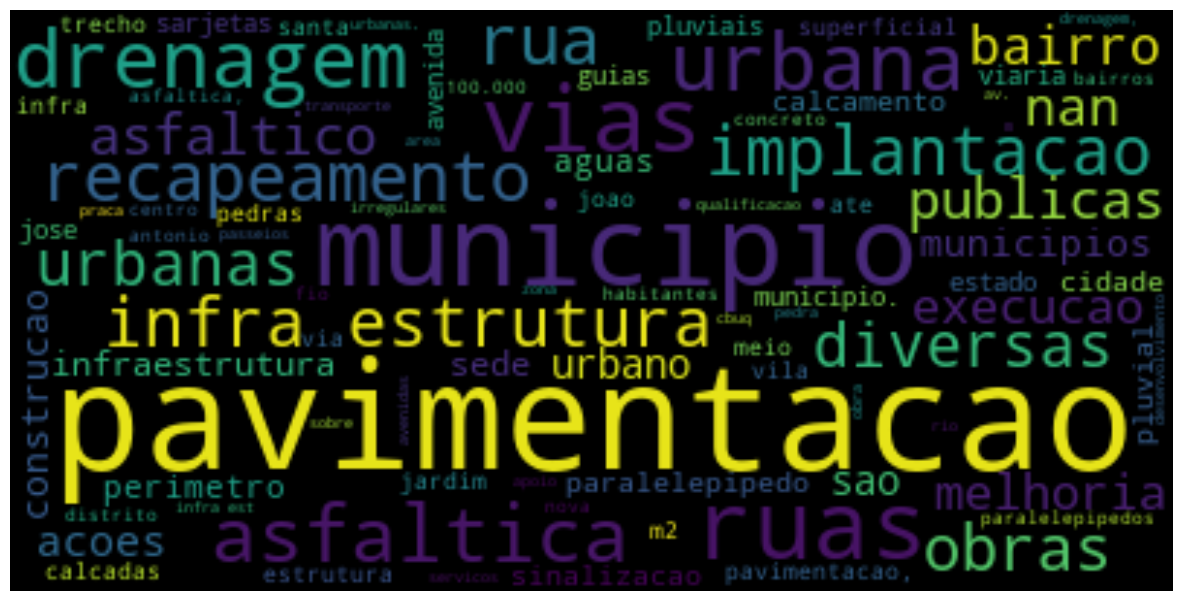

In [64]:
wordcloud = WordCloud()

contagem_dict = dict(zip(contagem.index, contagem.values))

wordcloud.generate_from_frequencies(frequencies = contagem_dict)
plt.figure(figsize = (15, 10)) # tamanho do gráfico
plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
plt.axis('off') # remove as bordas
plt.show() # mostra a word cloud

In [12]:
def trata_df_emprend(df, all_columns=True):
    keywords = {
        'IMPLANTACAO': ['IMPLANT', 'IMPAN'],
        'PAVIMENTACAO': ['PAV', 'PAPV'],
        'REFROTA': ['FROTA'],
        'SINALIZACAO': ['SINAL'],
        'CALCAMENTO': ['CALCAM'],
        'CICLOVIA': ['CICLO'],
        'CORREDOR': ['CORRED'],
        'DRENAGEM': ['DRENA'],
        'FERROVIA': ['FERROV', 'TRILH'],
        'TRANSPORTE': ['TRANSPORT'],
        'BRT': ['BRT'],
        'VLT': ['VLT'],
        'QUALIFICACAO': ['QUALI'],
        'MOBILIDADE URBANA': ['MOB', 'URB'],
        'AQUISICAO': ['AQUIS'],
        'POLONGAMENTO': ['PROLON'],
        'AMPLIACAO': ['AMPLI'],
        'RECAPEAMENTO': ['RECAP', 'CAPE'],
        'LINHA': ['LINHA'],
        'METRO': ['METR'],
        'VIARIA': [' VIARIA'],
        'AERO': ['AERO'],
        'REVITALIZACAO': ['REVIT'],
        'INFRAESTRUTURA': ['INFRA'],
        'PAC2ETAPA': ['PAC2ETAPA'],
        'FAIXA EXCLUSIVA': ['FAIXA EXCLUSIVA'],
        'RAPIDO': ['RAPIDO'],
        'SARJETA': ['SARJETA'],
        'NAN': ['NAN']
    }

    for key, values in keywords.items():
        df[f'aux_emp_{key.lower().replace(" ", "_")}'] = df['empreendimento'].apply(
            lambda x: key if any(v in x.upper() for v in values) else np.nan
        )

    df['new_empreend'] = df.filter(like='aux_emp_').apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

    if all_columns:
        return df
    return df.loc[:,~df.columns.str.startswith('aux')]

df_trat = trata_df_emprend(df_empreend.copy())
df_trat[['empreendimento', 'new_empreend']]

,empreendimento,new_empreend
0,IMPLANTACAO DO TRANSPORTE RAPIDO POR ONIBUS NO...,"IMPLANTACAO,CORREDOR,TRANSPORTE,RAPIDO"
1,CONSTRUCAO DO TERMINAL DE COSME E DAMIAO,
2,IMPLANTA«ŸO DO TRANSPORTE RAPIDO POR ONIBUS NO...,"IMPLANTACAO,CORREDOR,TRANSPORTE,RAPIDO"
3,NAN,NAN
4,"PAVIMENTACAO E QUALIFICACAO DE VIAS URBANAS, C...","PAVIMENTACAO,CALCAMENTO,DRENAGEM,QUALIFICACAO,..."
...,...,...
71243,REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTE ...,"REFROTA,TRANSPORTE"
71244,REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...,"REFROTA,TRANSPORTE"
71245,PRO - TRANSPORTES - REFROTA 17 AQUSICAO DE C...,"REFROTA,TRANSPORTE"
71246,REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...,"REFROTA,TRANSPORTE"


In [13]:
contagem2  = df_trat['new_empreend'].str.split(',').explode().value_counts()
contagem2

PAVIMENTACAO         46581
MOBILIDADE URBANA    20655
DRENAGEM             12228
INFRAESTRUTURA        9569
RECAPEAMENTO          8927
IMPLANTACAO           7668
NAN                   4902
SARJETA               2810
METRO                 2364
                      2347
SINALIZACAO           2108
CALCAMENTO            1344
QUALIFICACAO          1183
TRANSPORTE             772
VIARIA                 727
CICLOVIA               458
REVITALIZACAO          412
AMPLIACAO              297
CORREDOR               291
LINHA                  195
POLONGAMENTO           130
AQUISICAO              122
REFROTA                 92
AERO                    87
BRT                     64
FERROVIA                34
VLT                     26
PAC2ETAPA               14
FAIXA EXCLUSIVA         10
RAPIDO                   4
Name: new_empreend, dtype: int64

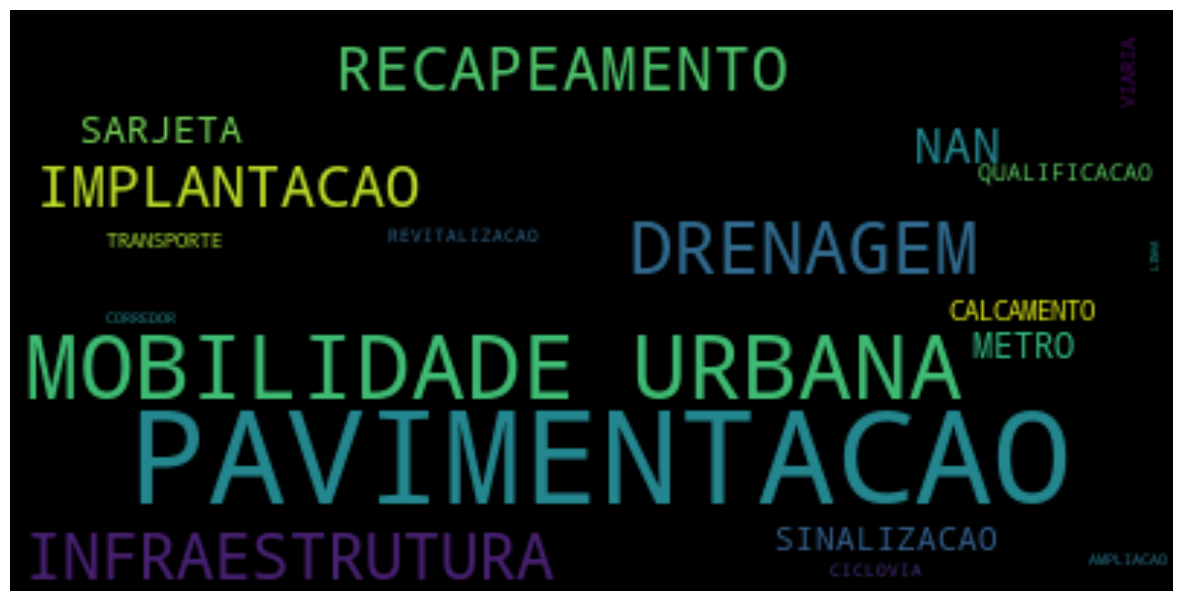

In [67]:
wordcloud = WordCloud()

contagem_dict2 = dict(zip(contagem2.index, contagem2.values))

wordcloud.generate_from_frequencies(frequencies = contagem_dict2)
plt.figure(figsize = (15, 10)) # tamanho do gráfico
plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
plt.axis('off') # remove as bordas
plt.show() # mostra a word cloud

In [14]:
df_trat

,cod_mdr,cod_operacao,cod_saci,cod_convenio_siafi,cod_ag_operador,origem,dsc_concedente,dsc_fonte,dsc_unidade,cod_proposta,...,aux_emp_viaria,aux_emp_aero,aux_emp_revitalizacao,aux_emp_infraestrutura,aux_emp_pac2etapa,aux_emp_faixa_exclusiva,aux_emp_rapido,aux_emp_sarjeta,aux_emp_nan,new_empreend
0,1-38001,319910.0,38001.0,0.0,375658.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RAPIDO,NaN,NaN,"IMPLANTACAO,CORREDOR,TRANSPORTE,RAPIDO"
1,1-38002,319912.0,38002.0,0.0,375664.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,1-38003,319914.0,38003.0,0.0,375666.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RAPIDO,NaN,NaN,"IMPLANTACAO,CORREDOR,TRANSPORTE,RAPIDO"
3,1-38004,354485.0,38004.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAN,NAN
4,1-38005,345051.0,38005.0,0.0,377438.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PAVIMENTACAO,CALCAMENTO,DRENAGEM,QUALIFICACAO,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71243,4-603771,603795.0,0.0,0.0,603771.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"REFROTA,TRANSPORTE"
71244,4-603772,603796.0,0.0,0.0,603772.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"REFROTA,TRANSPORTE"
71245,4-603787,603794.0,0.0,0.0,603787.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"REFROTA,TRANSPORTE"
71246,4-603797,603798.0,0.0,0.0,603797.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"REFROTA,TRANSPORTE"


In [16]:
df_trat.to_csv('../dados/tratados/simu_carteira_empreendimentos.csv', index=False)